<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Air_quality_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  

**NOTE:** Some useful references are included at the bottom of this spreadsheet.

Use the code cell below to work your code.

In [1]:
import pandas as pd

#read in data for 2021 air quality of Chatham Roadside
url = "https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA"
air_quality_2020 = pd.read_csv(url,skiprows=[0])

#remove 'nodata' rows from Nitrogen Dioxide column
for i in air_quality_2020.index:
  if air_quality_2020.loc[i, "Nitrogen dioxide"] == "nodata":
    air_quality_2020.drop(i, inplace = True) 

#convert all dates to Datetime format
air_quality_2020['Date'] = pd.to_datetime(air_quality_2020['Date'])

#convert Nitrogen dioxide column to float type
air_quality_2020['Nitrogen dioxide'] = pd.Float64Index(air_quality_2020['Nitrogen dioxide'])

#sort by Nitrogen dioxide
air_quality_2020 = air_quality_2020.sort_values("Nitrogen dioxide")

#add new column called 'weekdays'
air_quality_2020["Weekdays"] = air_quality_2020['Date'].dt.weekday

#rename Nitrogen dioxide column to "NO2 Level (V ug/m2)"
air_quality_2020.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m2)"}, inplace =True)

#drop the Status column
air_quality_2020_v2 = air_quality_2020.drop(["Status"],axis=1)


#read in data for 2021 air quality of Chatham Roadside
url =  "https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ"
air_quality_2021 = pd.read_csv(url, skiprows=[0])

print(air_quality_2021)
#remove 'nodata' rows from Nitrogen Dioxide column
for x in air_quality_2021.index:
  if air_quality_2021.loc[x, "Nitrogen dioxide"] == "nodata":
    air_quality_2021.drop(x, inplace = True) 

#convert all dates to Datetime format
air_quality_2021['Date'] = pd.to_datetime(air_quality_2021['Date'])

#convert Nitrogen dioxide column to float type
air_quality_2021['Nitrogen dioxide'] = pd.Float64Index(air_quality_2021['Nitrogen dioxide'])

#sort by Nitrogen dioxide
air_quality_2021 = air_quality_2021.sort_values("Nitrogen dioxide")

#add new column called 'weekdays'
air_quality_2021["Weekdays"] = air_quality_2021['Date'].dt.weekday

#rename Nitrogen dioxide column to "NO2 Level (V ug/m2)"
air_quality_2021.rename(columns = {"Nitrogen dioxide":"NO2 Level (V ug/m2)"}, inplace =True)

#drop the Status column
air_quality_2021_v2 = air_quality_2021.drop(["Status"],axis=1)

print(air_quality_2020_v2)
print(air_quality_2021_v2)


            Date   Time Nitrogen dioxide   Status
0     01/01/2021  01:00         16.58269  V µg/m³
1     01/01/2021  02:00         14.00478  V µg/m³
2     01/01/2021  03:00         15.35208  V µg/m³
3     01/01/2021  04:00         13.49688  V µg/m³
4     01/01/2021  05:00         12.47511  V µg/m³
...          ...    ...              ...      ...
8755  31/12/2021  20:00         12.51492  P µg/m³
8756  31/12/2021  21:00         14.00046  P µg/m³
8757  31/12/2021  22:00         10.04780  P µg/m³
8758  31/12/2021  23:00          3.49557  P µg/m³
8759  31/12/2021  24:00          4.15682  P µg/m³

[8760 rows x 4 columns]
           Date      Time  NO2 Level (V ug/m2)  Weekdays
3442 2020-05-23     11:00              0.31041         5
5844 2020-08-31     13:00              0.38390         0
7684 2020-11-16      5:00              0.40116         0
7756 2020-11-19      5:00              0.40229         3
3440 2020-05-23      9:00              0.41544         5
...         ...       ...        

### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [2]:
import numpy as np

#concatenate the two years of data and sort by date then print as a test
combined_df = pd.concat([air_quality_2020_v2, air_quality_2021_v2], join='inner', ignore_index=True)
combined_df = combined_df.sort_values("Date")

average_NO2 = combined_df.groupby(["Weekdays"])["NO2 Level (V ug/m2)"].mean()

#Group by Weekdays and show smmary stats by day of the week
air_quality_pivot = pd.pivot_table(combined_df, values = "NO2 Level (V ug/m2)", index = ["Weekdays"], aggfunc = np.mean)
print(air_quality_pivot)

combined_df.describe()

          NO2 Level (V ug/m2)
Weekdays                     
0                   14.303682
1                   15.297219
2                   16.355849
3                   14.871229
4                   14.893637
5                   13.851765
6                   11.661928


,NO2 Level (V ug/m2),Weekdays
count,17352.000000,17352.000000
mean,14.460902,3.016252
std,11.982317,1.994509
min,-0.777430,0.000000
25%,5.494935,1.000000
50%,10.765430,3.000000
75%,19.834232,5.000000
max,82.596090,6.000000


## 10/3/2022 - Update 
Returning to this project after several week on the Data Accelerator course, I wanted to add some visualisations and possible predictions to this project.

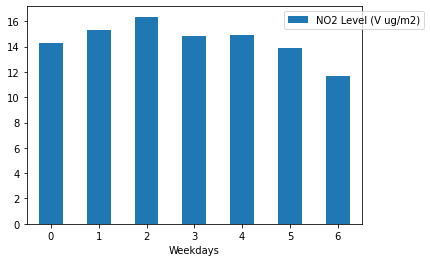

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

air_quality_pivot.plot(kind='bar').legend(bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=0)
plt.show()

Date
2020-01-01    31.136647
2020-01-02     3.386590
2020-01-03     2.639232
2020-01-04    10.976530
2020-01-05     4.982533
                ...    
2021-12-27     5.895281
2021-12-28     9.389313
2021-12-29     9.756699
2021-12-30     6.735220
2021-12-31     7.971897
Name: NO2 Level (V ug/m2), Length: 731, dtype: float64


/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ConversionError: ignored

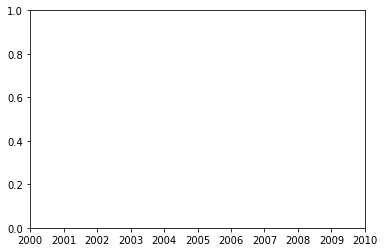

In [23]:



y = combined_df.groupby("Date")["NO2 Level (V ug/m2)"].mean()
print(y)
# x = combined_df.unique("Date")
plt.plot(x,y)


### Helpful references
---
Skipping rows when reading datasets:  
https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/  

Converting strings to dates:  
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

Dropping rows where data has a given value:  
https://www.datasciencemadesimple.com/drop-delete-rows-conditions-python-pandas/  
(see section Drop a row or observation by condition) 

Convert a column of strings to a column of floats:
https://datatofish.com/convert-string-to-float-dataframe/  

Create a new column from data converted in an existing column:  
https://www.geeksforgeeks.org/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/  

Rename a column:  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html  

Remove a column by name:  
https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-column-name-in-python#:~:text=Use%20the%20del%20keyword%20to,the%20name%20column_name%20from%20DataFrame%20.
